# Clustering 

This notebook contains code for the "Detecting Patterns for Machine Learning" course in June of 2020.

In [1]:
## Import Libraries 
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')


%matplotlib inline
#plt.style.use('seaborn-white')

## Python Crash

In [2]:
2 + 2

4

In [3]:
my_answer = 2 + 2 

In [4]:
my_answer

4

In [5]:
my_answers = np.array([2,4,5,6,7,8,4])

In [6]:
my_answers 

array([2, 4, 5, 6, 7, 8, 4])

In [7]:
my_answers * 3

array([ 6, 12, 15, 18, 21, 24, 12])

In [8]:
my_cubed_answers = my_answers * 3

In [9]:
my_cubed_answers.mean()

15.428571428571429

## K-Means 

In [10]:
## Create Cluster Data

X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3, 
                  cluster_std=0.8,
                  random_state=999 # Love ya ❤️
                 )

X = X + 30
X[:,1] = X[:,1] * 1000

In [11]:
data_frame = pd.DataFrame(X,y)

data_frame.columns = ['age','income']
data_frame = data_frame.round(2)

data_frame

,age,income
2,21.22,27921.12
2,21.56,27318.09
0,35.56,30526.98
1,22.19,32399.14
2,21.57,25120.52
0,36.18,30107.34
0,35.92,29863.99
2,21.96,26705.11
0,36.38,30502.01
2,20.88,26532.85


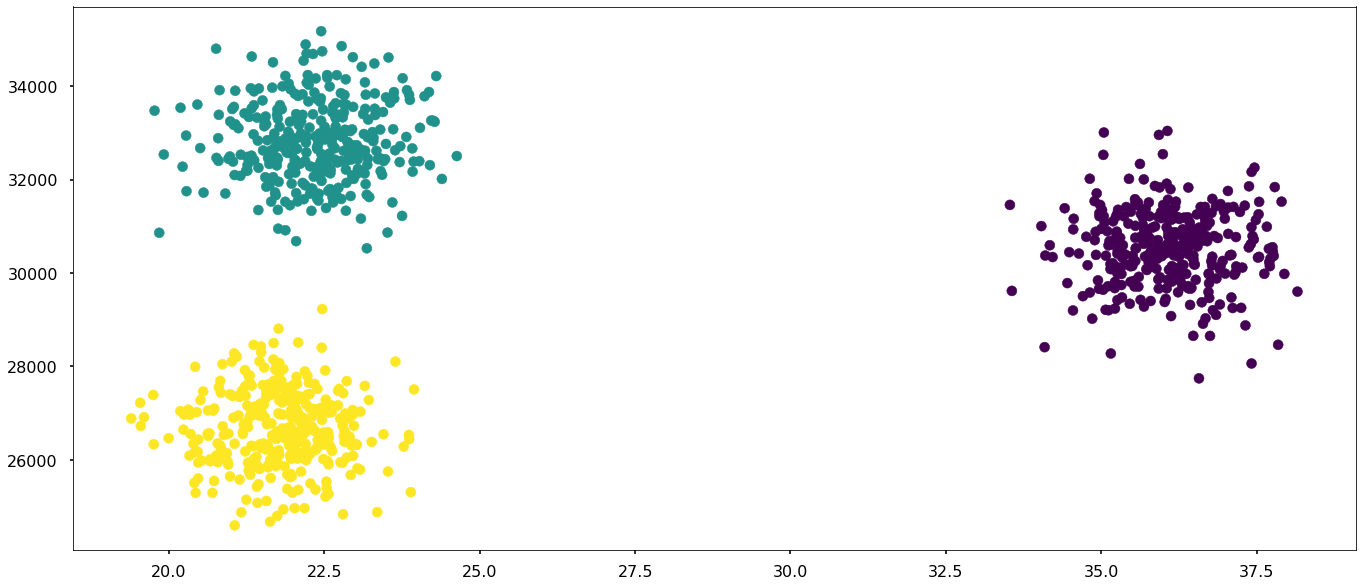

In [12]:
# Display Plot 

plt.figure(figsize=(23,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)
plt.show()

## Get Two Clusters

In [13]:
km2 = KMeans(n_clusters=2, 
             n_init=20,
             init='k-means++',
             algorithm='auto',
             random_state=21720,
             tol=0.0001,
             max_iter=1000,
             verbose=0
            )
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
       n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [14]:
km2.labels_

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [15]:
pd.Series(km2.labels_).value_counts(normalize=True)

1    0.647
0    0.353
dtype: float64

## Get Three Clusters 

In [16]:
km3 = KMeans(n_clusters=3,
             n_init=20,
             random_state=21720
            )
km3.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=0.0001, verbose=0)

In [17]:
km3.labels_

array([1, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 0,
       1, 2, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 2, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0,
       0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 2, 2, 0, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 1, 0,
       1, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2,
       1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 0, 2, 1, 0,

In [18]:
pd.Series(km3.labels_).value_counts(normalize=True)

2    0.350
1    0.336
0    0.314
dtype: float64

In [19]:
km3.cluster_centers_

array([[2.31445035e+01, 3.29536031e+04],
       [2.19882221e+01, 2.66704288e+04],
       [3.45111801e+01, 3.05708890e+04]])

In [20]:
# Sum of distances of samples to their closest cluster center.
km3.inertia_

556365215.8786745

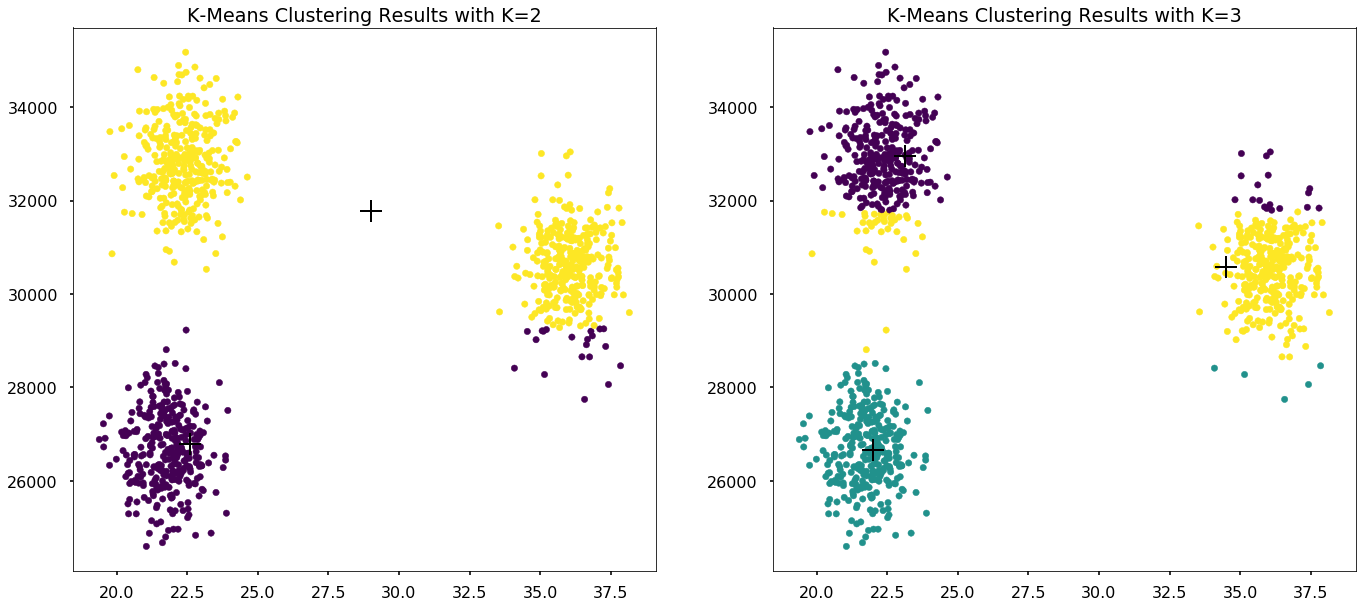

In [21]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23,10))

ax1.scatter(X[:,0], X[:,1], s=40, c=km2.labels_) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km3.labels_) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)
plt.show()

## Get Four Clusters

In [22]:
km4 = KMeans(n_clusters=4,
             n_init=20,
             random_state=21720,
             tol=0.00001
            )
km4.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=21720, tol=1e-05, verbose=0)

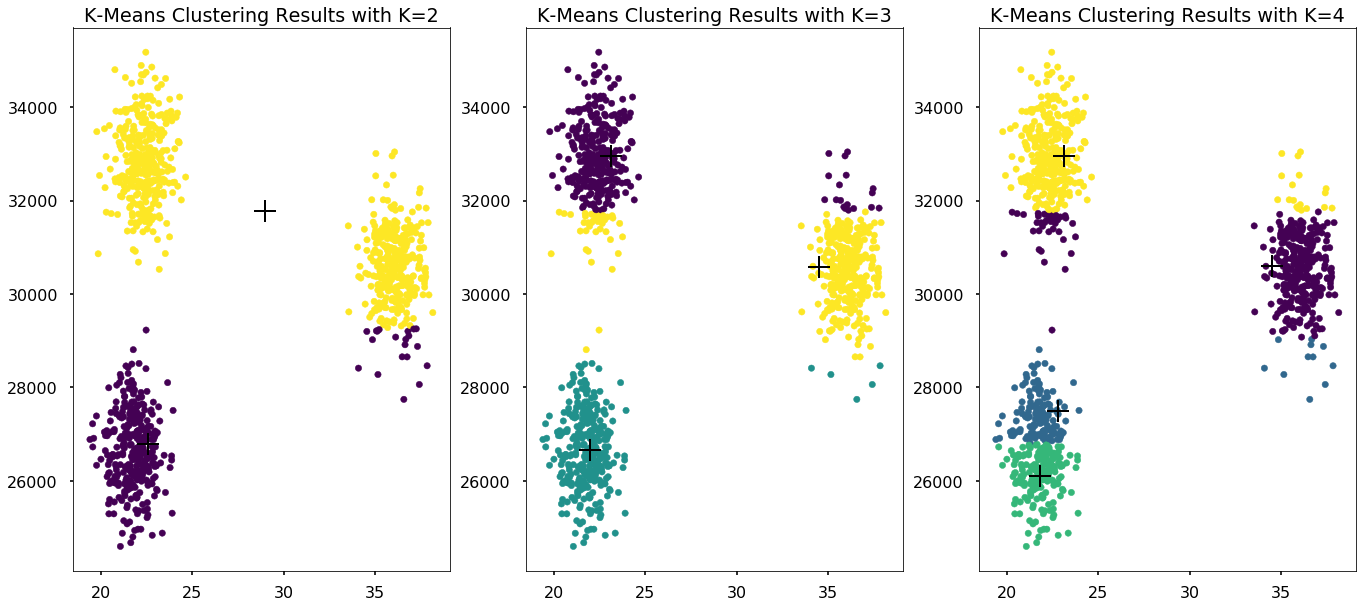

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(23,10))

ax1.scatter(X[:,0], X[:,1], s=40, c=km2.labels_) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km3.labels_) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km3.cluster_centers_[:,0], km3.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

ax3.scatter(X[:,0], X[:,1], s=40, c=km4.labels_) 
ax3.set_title('K-Means Clustering Results with K=4')
ax3.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1], marker='+', s=500, c='k', linewidth=2)

plt.show()

## Help Pick Cluster Numbers

If you don't know the number of final clusters that you are trying to find, you shoud use `Hierarchical Clustering`. However, let's said that you are forced to  use `K Means` without knowing `k`:

In [24]:
# Preprocessing is needed. Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create empty list for silhouette scores
silhouette_scores = []

# Create empty list for inertia scores
inertia_scores = []

# Range of k values to try
k_values = range(2, 10)

for k in k_values:
    km =  KMeans(n_clusters=k,
                 n_init=20,
                 random_state=21720,
                 tol=0.00001
                )
    km.fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_, metric='euclidean', random_state=21720)
    silhouette_scores.append(score)
    inertia_scores.append(km.inertia_)

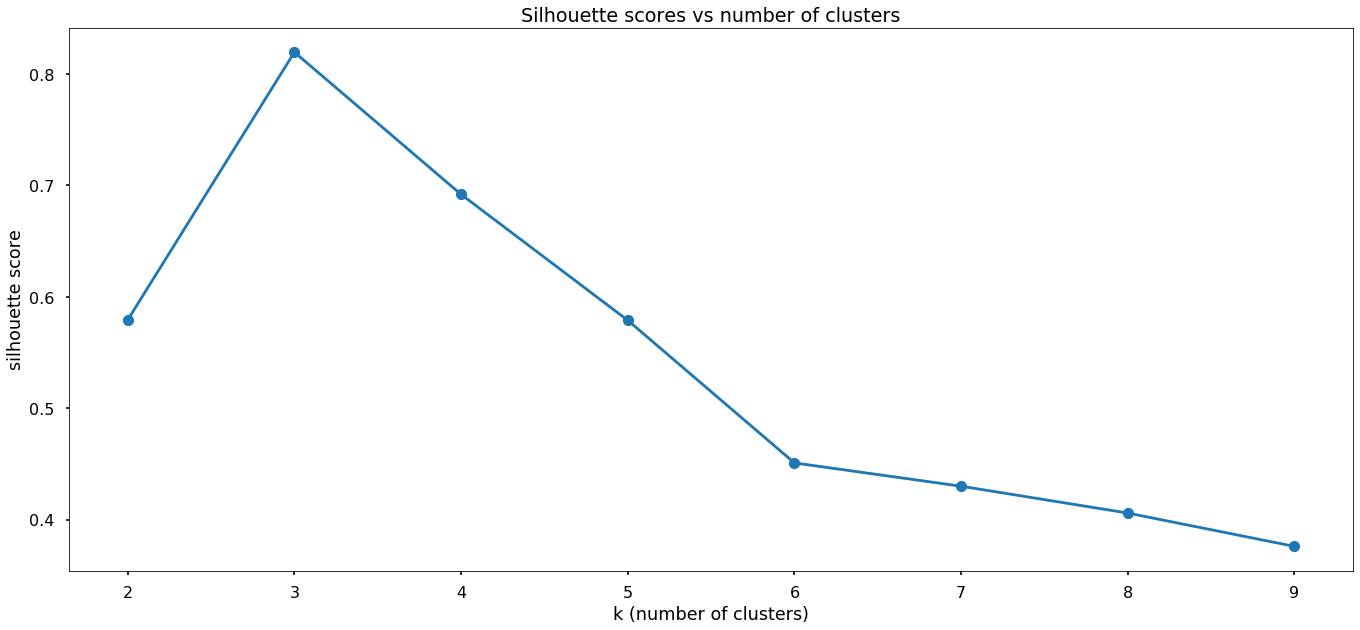

In [25]:
plt.figure(figsize=(23,10))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')
plt.show()

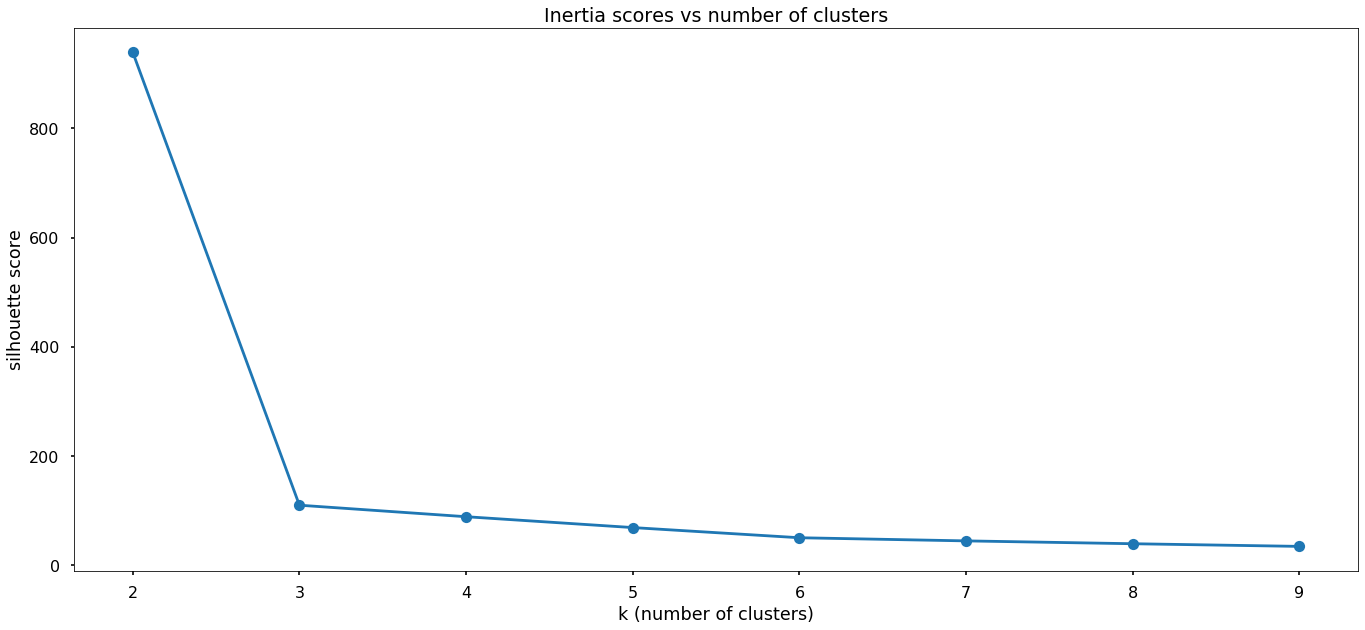

In [26]:
plt.figure(figsize=(23,10))
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Inertia scores vs number of clusters')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')
plt.show()

There is a clear "elbow" in the `silhouette score` graph at 3 clusters, and it looks like there is an elbow at 3 clusters as well in the second graph where we're using `Within Cluster Sum of Squares`, also known as `Inertia`, as our evaluation metric. These evidences suggest that there are 3 clusters as indeed we know that they are because we generated the data setting the number of clusters to 3.

## Hierarchical Clustering

In [44]:
Y = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [85,70],
    [71,80],
    [60,78],
    [70,55],
    [80,91],])

In [45]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] += 3
X[:25,1] += -4

X[:5]

array([[ 2.58324215, -4.05626683],
       [ 0.8638039 , -2.35972919],
       [ 1.20656441, -4.84174737],
       [ 3.50288142, -5.24528809],
       [ 1.94204778, -4.90900761]])

Text(0.5, 1.0, 'Some Random Data')

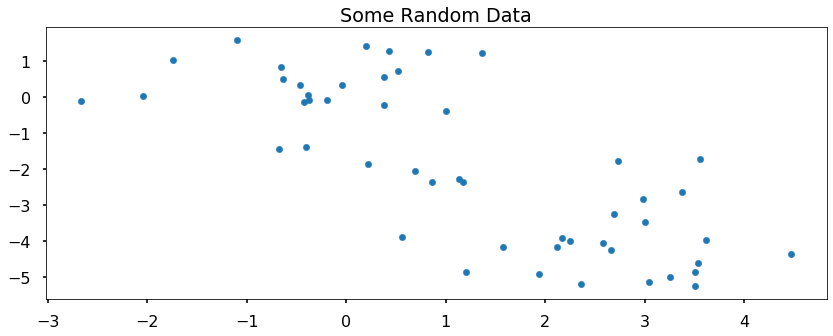

In [46]:
fig, (ax1) = plt.subplots(1, figsize=(14,5))
ax1.scatter(X[:,0], X[:,1], s=40, cmap=plt.cm.prism) 
plt.title("Some Random Data")

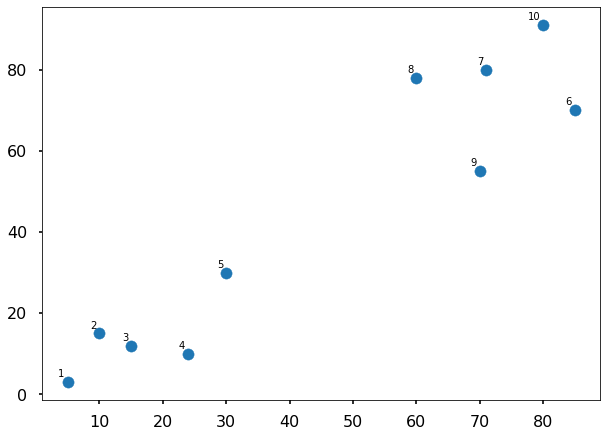

In [47]:
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(Y[:,0],Y[:,1], label='True Position')

for label, x, y in zip(labels, Y[:, 0], Y[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

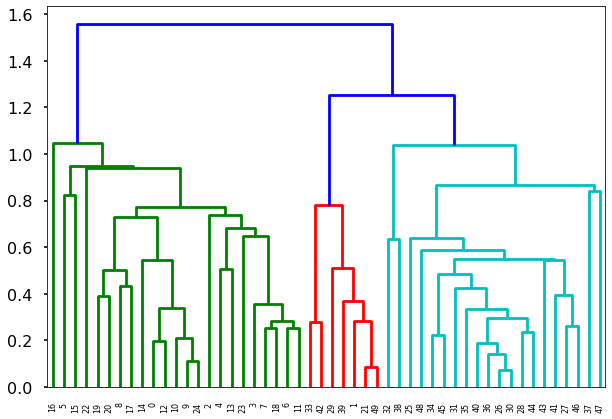

In [49]:
# Step 1: Select the type of linkage and generate the hierarchical clusters
linked = shc.linkage(X, 'single')

plt.figure(figsize=(10, 7))
# Step 2: Plot the hierarchical clustering as a dendrogram
shc.dendrogram(linked)
plt.show()

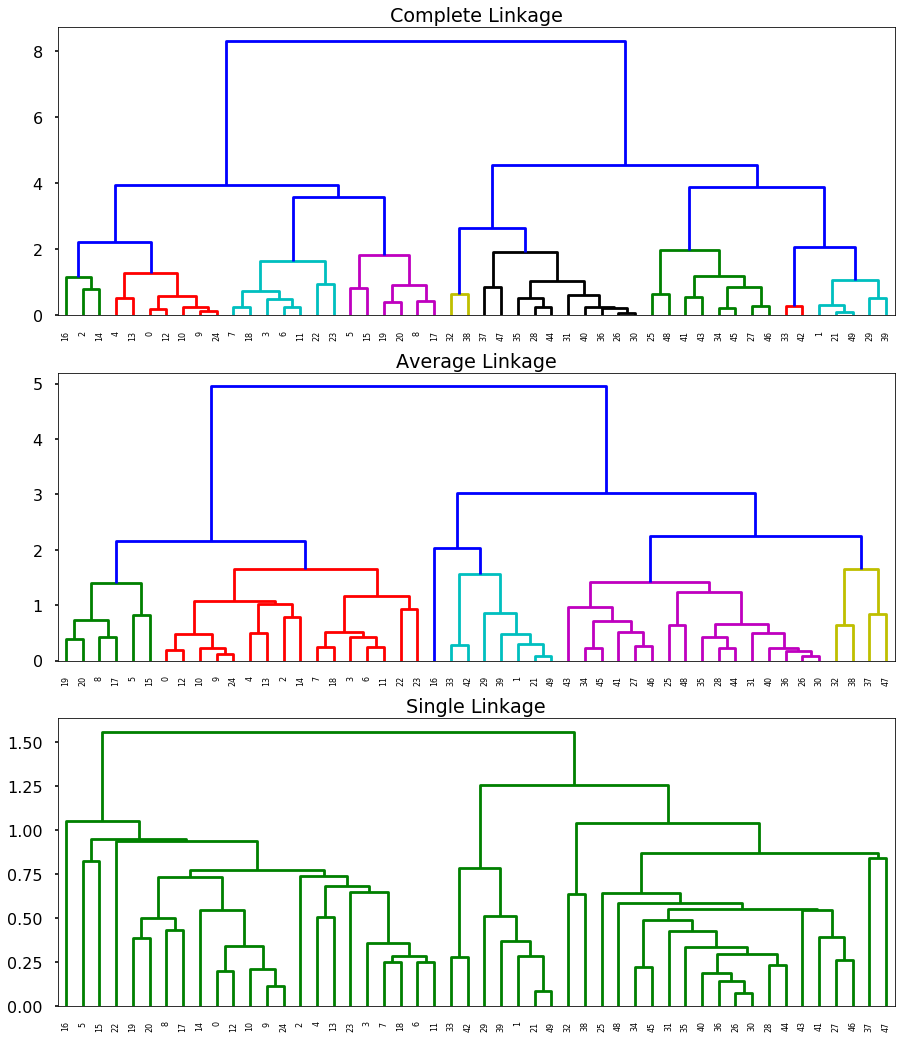

In [50]:
# We repeat the process 3 times to try multiple types of linkage
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

# This time we define linkage through functions instead of an argument
for linkage, cluster, ax in zip([shc.complete(X),
                                 shc.average(X),
                                 shc.single(X)],
                                ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    shc.dendrogram(linkage, ax=ax, color_threshold=2)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');

## Segmentation Analysis Case Study

In [31]:
customer_data = pd.read_csv('shopping-data.csv')

In [32]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
data = customer_data.iloc[:, 3:5].values

In [34]:
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [125.0, 125.0, 143.75, 143.75],
  [115.0, 115.0, 134.375, 134.375],
  [92.5, 92.5, 124.6875, 124.6875],
  [70.0, 70.0, 108.59375, 108.59375],
  [42.5, 42.5, 89.296875, 89.296875],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [180.0, 180.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [222.5, 222.5, 252.5, 252.5],
  [190.0, 190.0, 237.5, 237.5],
  [275.0, 275.0, 285.0, 285.0],
  [295.0, 295.0, 305.0, 305.0],
  [280.0, 280.0, 300.0, 300.0],
  [213.75, 213.75, 290.0, 290.0],
  [65.8984375, 65.8984375, 251.875, 251.875],
  [315.0, 315.0, 325.0, 325.0],
  [375.0, 375.0, 3

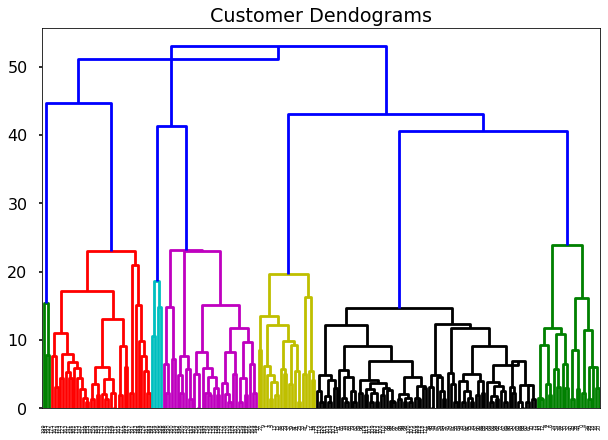

In [35]:
# This time we embed our clustering engine inside of the plot generator (a one liner!)
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
shc.dendrogram(shc.linkage(data, method='centroid'))

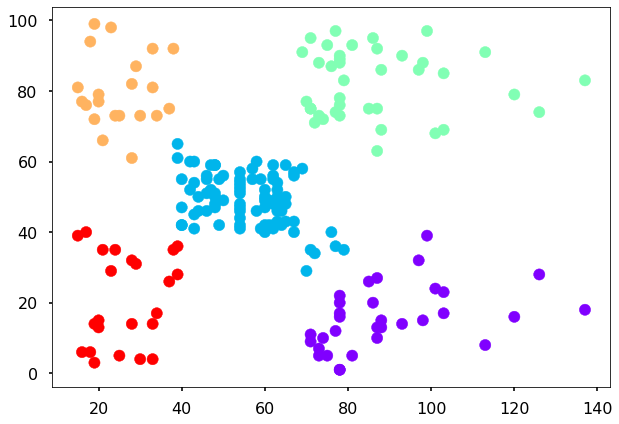

In [36]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')